In [1]:
import pandas as pd
import matplotlib.pyplot as plt

ts = pd.read_csv('Boat__2.txt', delimiter=' ')

ts['t'] = ts['t'].cumsum()
ts.set_index('t', inplace=True)
ts

,x,y,z
t,,,
5,-0.085,-0.065,10.090
10,-0.505,-0.390,9.496
15,-0.505,-0.390,9.496
20,-0.505,-0.390,9.496
26,-0.505,-0.390,9.496
...,...,...,...
51106,0.067,0.107,9.448
51110,0.201,-0.036,9.669
51115,0.201,-0.036,9.669


In [2]:
ts.describe()

,x,y,z
count,10225.000000,10225.000000,10225.000000
mean,0.127812,0.101779,9.586806
std,0.165859,0.136000,0.365573
min,-0.505000,-0.390000,8.280000
25%,0.019000,0.011000,9.343000
50%,0.125000,0.107000,9.582000
75%,0.230000,0.202000,9.822000
max,0.738000,0.547000,10.885000


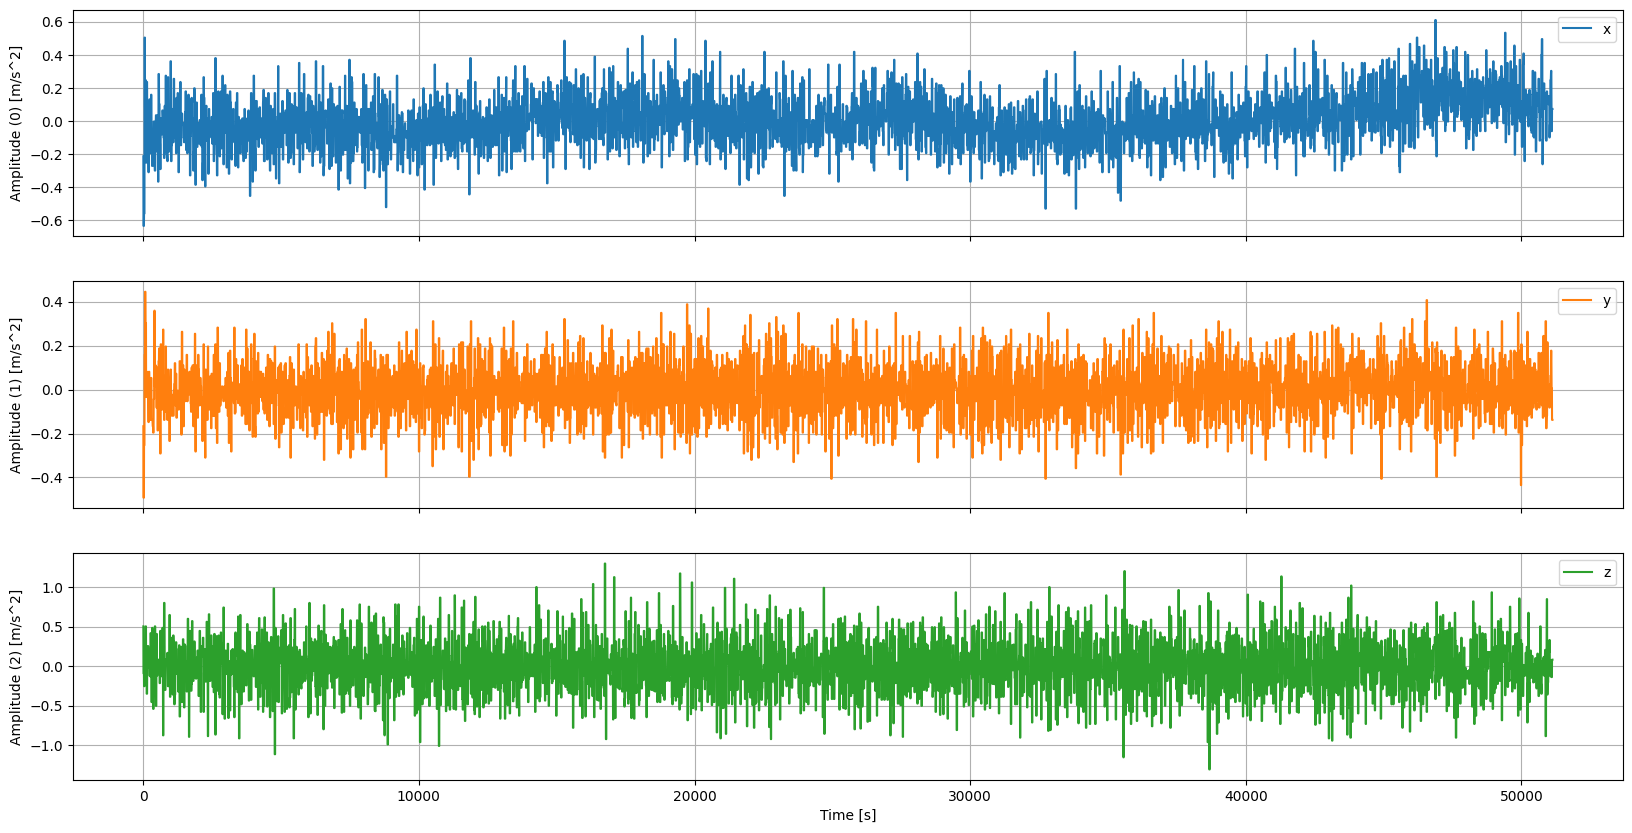

In [3]:
for dim in ts.columns:
    ts[dim] -= ts[dim].mean()

ax = ts[['x', 'y', 'z']].plot(figsize=(20, 10), grid=True, subplots=True)
for i in range(3):
    ax[i].set_xlabel('Time [s]')
    ax[i].set_ylabel(f'Amplitude ({i}) [m/s^2]')

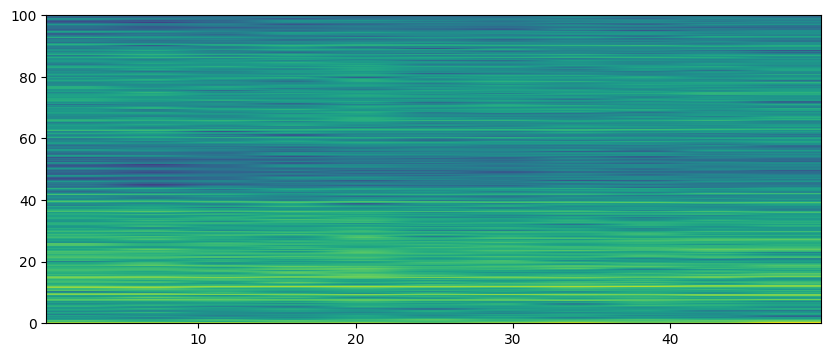

In [5]:
x = ts['x']
NFFT = 1024
Fs = 200
plt.figure(figsize=(10, 4))
Pxx, freqs, t, im = plt.specgram(x, NFFT=NFFT, Fs=Fs, mode='magnitude', scale='dB')

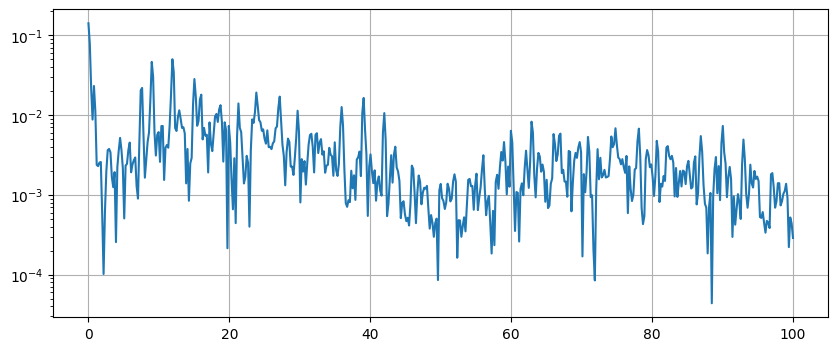

In [140]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(freqs, Pxx.T[10])
ax.grid(True)
ax.set_yscale('log')

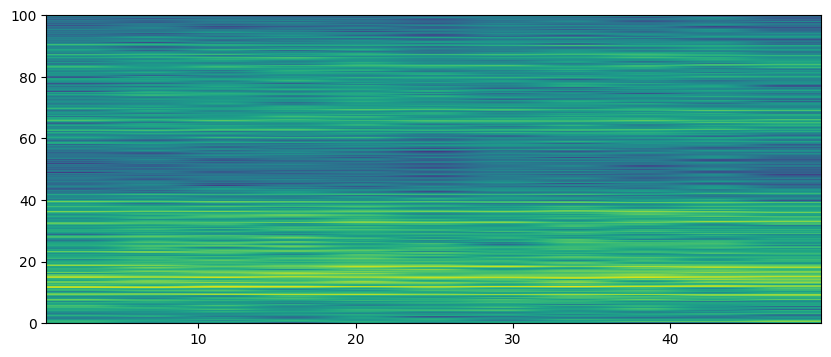

In [6]:
x = ts['z']
plt.figure(figsize=(10, 4))
Pxx, freqs, t, im = plt.specgram(x, NFFT=NFFT, Fs=Fs, mode='magnitude', scale='dB')

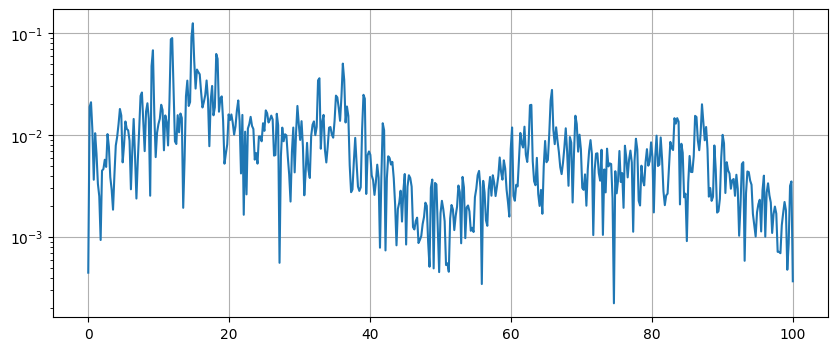

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(freqs, Pxx.T[8])
ax.grid(True)
ax.set_yscale('log')

<Axes: >

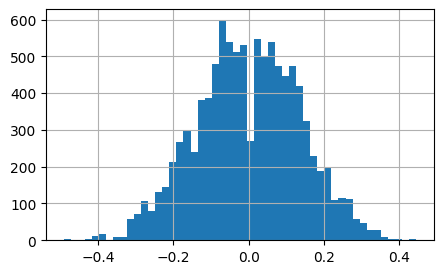

In [8]:
ts['y'].hist(figsize=(5, 3), grid=True, bins=50)

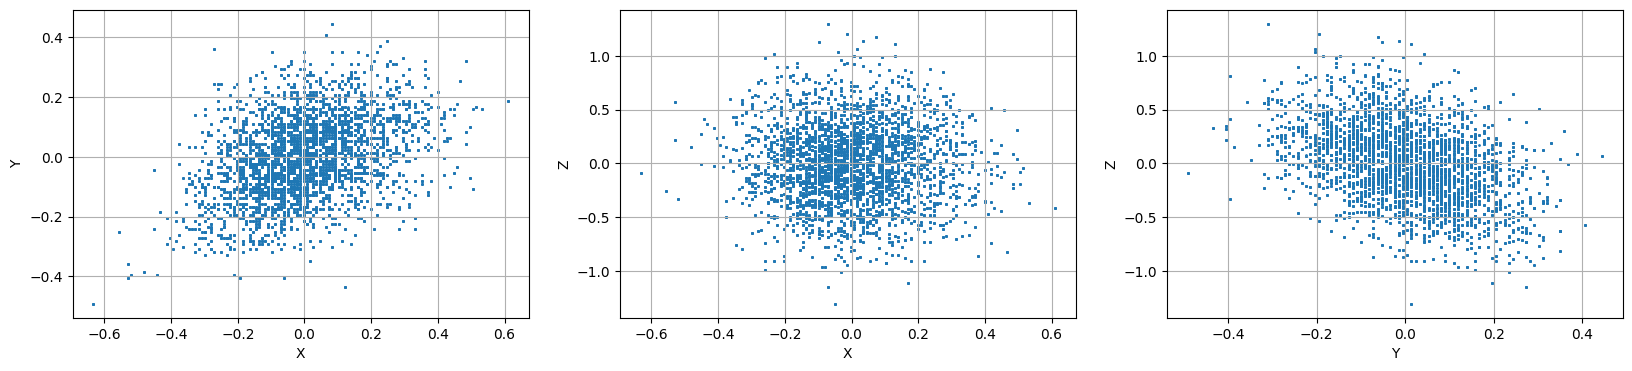

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(20, 4))
ax[0].scatter(ts['x'], ts['y'], s=1)
ax[0].grid(True)
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].grid(True)

ax[1].scatter(ts['x'], ts['z'], s=1)
ax[1].grid(True)
ax[1].set_xlabel('X')
ax[1].set_ylabel('Z')

ax[2].scatter(ts['y'], ts['z'], s=1)
ax[2].grid(True)
ax[2].set_xlabel('Y')
ax[2].set_ylabel('Z')
plt.show()

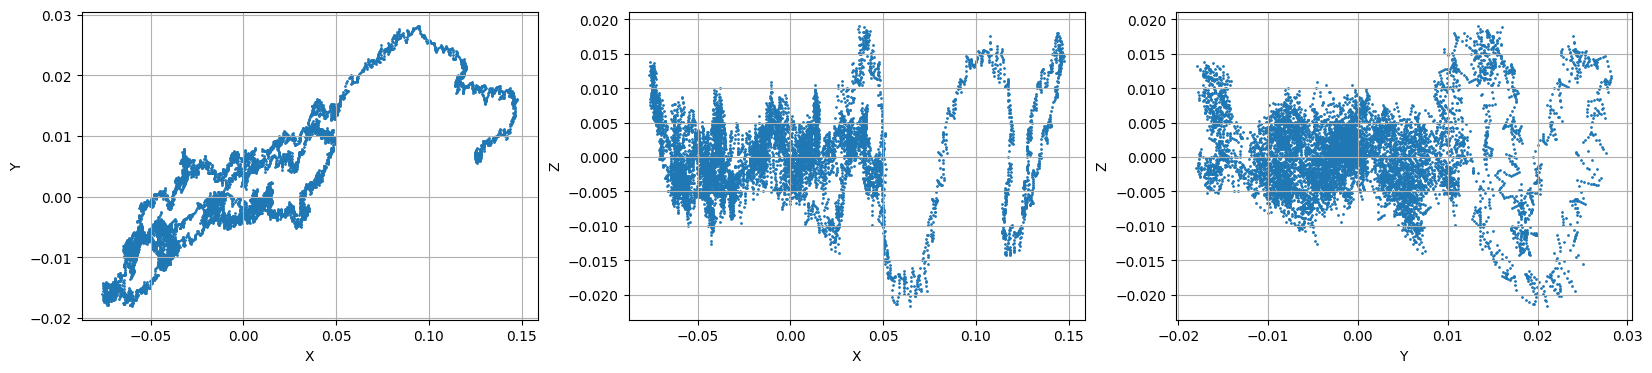

In [10]:
smooth = 800
fig, ax = plt.subplots(1, 3, figsize=(20, 4))
ax[0].scatter(
    ts['x'].rolling(window=smooth).mean(),
    ts['y'].rolling(window=smooth).mean(),
    s=1
)
ax[0].grid(True)
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].grid(True)

ax[1].scatter(
    ts['x'].rolling(window=smooth).mean(),
    ts['z'].rolling(window=smooth).mean(),
    s=1
)
ax[1].grid(True)
ax[1].set_xlabel('X')
ax[1].set_ylabel('Z')
ax[1].grid(True)

ax[2].scatter(
    ts['y'].rolling(window=smooth).mean(),
    ts['z'].rolling(window=smooth).mean(),
    s=1
)
ax[2].grid(True)
ax[2].set_xlabel('Y')
ax[2].set_ylabel('Z')
ax[2].grid(True)

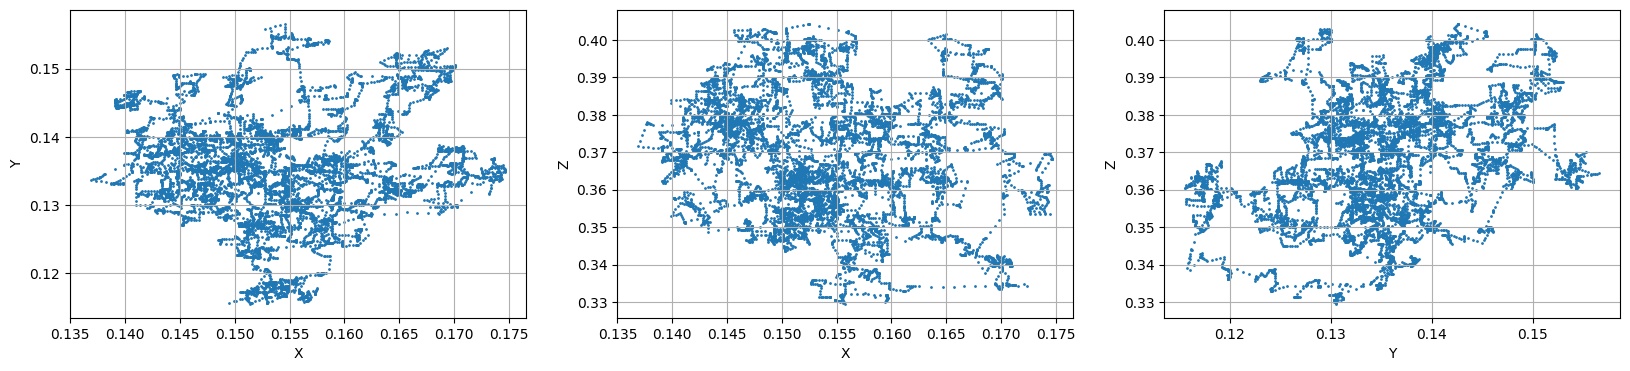

In [11]:
smooth = 800
fig, ax = plt.subplots(1, 3, figsize=(20, 4))
ax[0].scatter(
    ts['x'].rolling(window=smooth).std(),
    ts['y'].rolling(window=smooth).std(),
    s=1
)
ax[0].grid(True)
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].grid(True)

ax[1].scatter(
    ts['x'].rolling(window=smooth).std(),
    ts['z'].rolling(window=smooth).std(),
    s=1
)
ax[1].grid(True)
ax[1].set_xlabel('X')
ax[1].set_ylabel('Z')
ax[1].grid(True)

ax[2].scatter(
    ts['y'].rolling(window=smooth).std(),
    ts['z'].rolling(window=smooth).std(),
    s=1
)
ax[2].grid(True)
ax[2].set_xlabel('Y')
ax[2].set_ylabel('Z')
ax[2].grid(True)

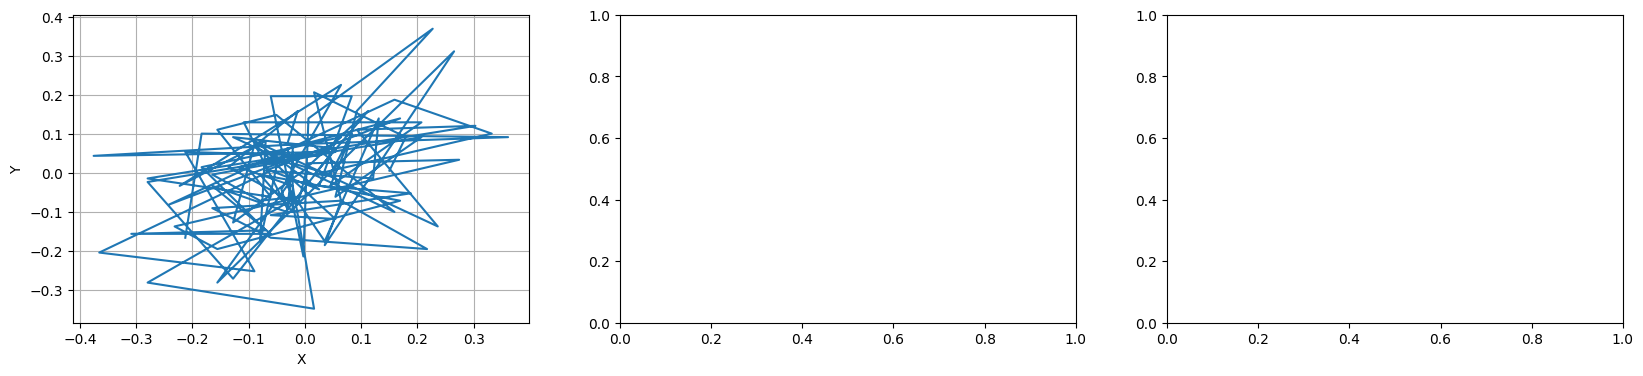

In [12]:
a = ts.iloc[::100, :].interpolate(method='cubic')
fig, ax = plt.subplots(1, 3, figsize=(20, 4))
ax[0].plot(a['x'], a['y'])
ax[0].grid(True)
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].grid(True)